In [43]:
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import warnings

In [44]:
# CONFIGURANDO A EXIBIÇAO DE REGISTROS NA TELA #

pd.options.display.max_rows = 999
pd.options.display.max_columns=999
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# IMPORTAÇÃO ARQUIVO SAP DCR CABEÇALHO

In [17]:
arquivo_RUK = 'C:\\Temp\\faton_siva\\SAP\\arquivo_MO_RUK.csv'

dfRUK = pd.read_csv(arquivo_RUK
                    , sep=';'
                    , names=['BERNR'
                             ,'ERDAT'
                             ,'FAHRZ'
                             ,'VBKZ'
                             ,'SDATE'
                             ,'STIME'
                             ,'EDATE'
                             ,'ETIME']
                   ,dtype={'BERNR':'str'
                          ,'ERDAT':'str'
                          ,'FAHRZ':'str'
                          ,'VBKZ':'str'
                          ,'SDATE':'str'
                          ,'STIME':'str'
                          ,'EDATE':'str'
                          ,'ETIME':'str'}
                   ,header=0)



dfRUK

,BERNR,ERDAT,FAHRZ,VBKZ,SDATE,STIME,EDATE,ETIME
0,1009398647,20220530,NaN,E,20220531,083502,20220531,181210
1,1009398552,20220530,NaN,E,20220530,184005,00000000,000000
2,1009398644,20220530,NaN,E,20220531,061631,20220601,201404
3,1009398560,20220530,NaN,E,20220530,184802,00000000,000000
4,1009398585,20220530,NaN,E,20220531,063521,20220531,115858
...,...,...,...,...,...,...,...,...
1458950,1009738362,20220817,NaN,E,20220817,174655,20220823,133812
1458951,1009931392,20220930,NaN,E,20221001,103017,20221006,073030
1458952,1009941656,20221003,NaN,E,20221004,065740,20221006,151701
1458953,1010078933,20221104,NaN,E,20221107,072348,20221110,142644


# IMPORTAÇÃO ARQUIVO SAP DCR ITEM 

In [117]:
arquivo_RUP = 'C:\\Temp\\faton_siva\\SAP\\arquivo_MO_RUP.csv'

dfRUP = pd.read_csv(arquivo_RUP, sep=';',header=0,encoding='latin-1'
                   , names=['BERNR'
                            ,'POSNR'
                            ,'GBSTA'
                            ,'VBELN'
                            ,'VPOSN'
                            ,'SZEIT'
                            ,'EZEIT'
                            ,'OII_TANKID'
                            ,'METST'
                            ,'METEND'
                            ,'GAUGE_QTY'
                            ,'MENGE'
                            ,'PRSDT'
                            ,'KUNWE'
                            ,'PSTYV'
                            ,'DATUM']
                   ,dtype={'BERNR':'str'
                            ,'POSNR':'str'
                            ,'GBSTA':'str'
                            ,'VBELN':'str'
                            ,'VPOSN':'str'
                            ,'SZEIT':'str'
                            ,'EZEIT':'str'
                            ,'OII_TANKID':'str'
                            ,'METST':'str'
                            ,'METEND':'str'
                            ,'GAUGE_QTY':'str'
                            ,'MENGE':'str'
                            ,'PRSDT':'str'
                            ,'KUNWE':'str'
                            ,'PSTYV':'str'
                            ,'DATUM':'str'})

dfRUP['VBELN'].fillna('-1',inplace=True)

dfRUP['Chave'] = dfRUP['BERNR'] + dfRUP['VBELN']

dfRUP[dfRUP['Chave']=='10090175620029952763']

,BERNR,POSNR,GBSTA,VBELN,VPOSN,SZEIT,EZEIT,OII_TANKID,METST,METEND,GAUGE_QTY,MENGE,PRSDT,KUNWE,PSTYV,DATUM,Chave
1526873,1009017562,000050,C,0029952763,000010,165238,170256,PRODUÇÃO,000000000,000397693,385.900,190.000,20220216,0003781127,ZGON,20220314,10090175620029952763


# IMPORTAÇÃO ARQUIVO DEVOLUÇÃO URSULA

In [28]:
arquivo_DEV_URSULA = 'C:\\Temp\\faton_siva\\DEV_URSULA\\Homolog dev FATON 14-11.xlsx'

dfDEV_URSULA = pd.read_excel(arquivo_DEV_URSULA
                            ,sheet_name='BASE SAP SÓ DEVOLUÇÃO'
                            ,usecols=[0,1,2,3,4]
                            ,names=['CodRelatorioCodDocVenda','Validacao', 'CodRelatorio', 'CodDocVenda','NumItemDocVenda']
                            ,dtype={
                                'CodRelatorioCodDocVenda':'str'
                                ,'Validacao':'str'
                                , 'CodRelatorio':'str'
                                , 'CodDocVenda':'str'
                                ,'NumItemDocVenda':'str'
                            })


dfDEV_URSULA['CodDocVenda'] = pd.Series(dfDEV_URSULA['CodDocVenda']).astype(str).str.zfill(10) 

dfDEV_URSULA['CodRelatorioCodDocVenda'] = dfDEV_URSULA['CodRelatorio'] + dfDEV_URSULA['CodDocVenda']


In [118]:
dfDEV_URSULA_NE = dfDEV_URSULA[dfDEV_URSULA['Validacao']!='-1']
dfDEV_URSULA_NE

,CodRelatorioCodDocVenda,Validacao,CodRelatorio,CodDocVenda,NumItemDocVenda
0,10088399930029981264,Não encontrado,1008839993,0029981264,10
1,10088558450029889660,Não encontrado,1008855845,0029889660,10
2,10088729870029981264,Não encontrado,1008872987,0029981264,10
3,10088823400029889660,Não encontrado,1008882340,0029889660,10
4,10089067840030198403,Não encontrado,1008906784,0030198403,10
...,...,...,...,...,...
1623,10091529920031095307,100915299231095307,1009152992,0031095307,10
1624,10091548620030811836,100915486230811836,1009154862,0030811836,10
1625,10091548620030903786,Não encontrado,1009154862,0030903786,10
1626,10091548620030948232,100915486230948232,1009154862,0030948232,10


In [ ]:
# IMPORTAÇÃO ARQUIVO tmp_ordem_processo_faton_agrd

# IMPORTAÇÃO ARQUIVO tmp_DEVOLUCAO_FATON

### ESSE ARQUIVO SEGUE O NOVO DESENVOLVIMENTO

In [119]:
arquivo_DEV_tmp_DEVOLUCAO_FATON = 'C:\\Temp\\faton_siva\\DEV_URSULA\\tmp_DEVOLUCAO_FATON.csv'

dfDEV_tmp_DEVOLUCAO_FATON = pd.read_csv(arquivo_DEV_tmp_DEVOLUCAO_FATON
                                          ,sep=','
                            ,usecols=[0,1,2,3]
                            ,names=['CodDocVenda','NumItemDocVenda','CodDocVendaPlan', 'CodRelatorio']
                            ,dtype={
                                'CodDocVenda':'str'
                                ,'NumItemDocVenda':'int'
                                , 'CodDocVendaPlan':'str'
                                , 'CodRelatorio':'str'
                            }
                            ,header=0
                            )


dfDEV_tmp_DEVOLUCAO_FATON['CodDocVenda'] = pd.Series(dfDEV_tmp_DEVOLUCAO_FATON['CodDocVenda']).astype(str).str.zfill(10) 

dfDEV_tmp_DEVOLUCAO_FATON['Chave'] = dfDEV_tmp_DEVOLUCAO_FATON['CodRelatorio'] + dfDEV_tmp_DEVOLUCAO_FATON['CodDocVenda']


resultAmostra2 = pd.merge(left=dfDEV_URSULA_NE
                              , right=dfDEV_tmp_DEVOLUCAO_FATON
                              , left_on='CodRelatorioCodDocVenda'
                              , right_on='Chave' 
                              ,how='left'
                                    )[['CodRelatorioCodDocVenda'
                                       ,'Chave'
                                       ,'Validacao']]

resultAmostra2.loc[resultAmostra2['CodRelatorioCodDocVenda'] == resultAmostra2['Chave'], 'Comparacao'] = 'Existe'
resultAmostra2.loc[resultAmostra2['CodRelatorioCodDocVenda'] != resultAmostra2['Chave'], 'Comparacao'] = 'Não Existe'


resultAmostra2 = resultAmostra2.drop_duplicates(
  subset = ['CodRelatorioCodDocVenda','Chave'],
  keep = 'last').reset_index(drop = True)

resultAmostra2.groupby(['Comparacao'],as_index=False).agg(Qtd=('Comparacao','count'))

#resultAmostra2[resultAmostra2['Comparacao']=='Não Existe']

,Comparacao,Qtd
0,Existe,1625
1,Não Existe,1


# <class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759613 entries, 0 to 1759612

Data columns (total 15 columns):

0   codordem              int64 

2   codmodoatualizacao    object 

3   codrelatorio          int64  

4   codstatusitem         object 

5   flagdevolvidafaton    object 

6   flaglancadorecibo     object 

7   flagfaturado          object 

8   flagnotacancelada     object 

9   flagincluidafaton     object 

10  nomunidademedida      object 

11  qtdperdasobra         object 

12  qtd                   float64

13  datahoracriacaofaton  object 

14  seq_opp               int64  

dtypes: float64(1), int64(4), object(10)

memory usage: 201.4+ MB

In [96]:
arquivo_ProcessoFATON = 'C:\\Temp\\faton_siva\\DEV_URSULA\\tmp_ordem_processo_faton_agrd.csv'

dfProcessoFATON = pd.read_csv(arquivo_ProcessoFATON
                              , sep=','
                              , usecols=[0,3,5,13]
                              , names=['CodDocVenda','CodRelatorio','FlagDevolvidaFATON','DthCriacaoFaton']
                              , dtype={'CodDocVenda':'str'
                                        ,'CodRelatorio':'str'
                                        ,'FlagDevolvidaFATON':'str'
                                        ,'DthCriacaoFaton':'str'}
                              , header=0)

#dfProcessoFATON['CodDocVenda'] = pd.Series(dfProcessoFATON['CodDocVenda']).astype(str).str.zfill(10) 

#dfProcessoFATON['Chave'] = dfProcessoFATON['CodRelatorio'] + dfProcessoFATON['CodDocVenda']

dfProcessoFATON['AnoMes'] = dfProcessoFATON['DthCriacaoFaton'].str[:7]

dfProcessoFATON.groupby(['AnoMes','FlagDevolvidaFATON'],as_index=False).agg(Qtd=('FlagDevolvidaFATON','count')).sort_values(by='AnoMes')


C:\Users\gabriel.quintella\AppData\Local\Temp\ipykernel_21568\3479962996.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfProcessoFATON = pd.read_csv(arquivo_ProcessoFATON


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759613 entries, 0 to 1759612
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   codordem              int64  
 1   coditem               int64  
 2   codmodoatualizacao    object 
 3   codrelatorio          int64  
 4   codstatusitem         object 
 5   flagdevolvidafaton    object 
 6   flaglancadorecibo     object 
 7   flagfaturado          object 
 8   flagnotacancelada     object 
 9   flagincluidafaton     object 
 10  nomunidademedida      object 
 11  qtdperdasobra         object 
 12  qtd                   float64
 13  datahoracriacaofaton  object 
 14  seq_opp               int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 201.4+ MB


In [86]:
resultAmostra2 = pd.merge(left=dfDEV_URSULA
                              , right=dfProcessoFATON
                              , left_on='CodRelatorioCodDocVenda'
                              , right_on='Chave' 
                              ,how='left'
                                    )[['CodRelatorioCodDocVenda'
                                       ,'Chave'
                                       ,'Validacao']]

resultAmostra2.loc[resultAmostra2['CodRelatorioCodDocVenda'] == resultAmostra2['Chave'], 'Comparacao'] = 'Existe'
resultAmostra2.loc[resultAmostra2['CodRelatorioCodDocVenda'] != resultAmostra2['Chave'], 'Comparacao'] = 'Não Existe'

resultAmostra2 = resultAmostra2.drop_duplicates(
  subset = ['CodRelatorioCodDocVenda','Chave'],
  keep = 'last').reset_index(drop = True)

resultAmostra2.groupby(['Comparacao'],as_index=False).agg(Qtd=('Comparacao','count'))

,Comparacao,Qtd
0,Existe,1626


In [57]:
resultAmostra = pd.merge(left=dfDEV_URSULA_NE
                              , right=dfRUP
                              , left_on='CodRelatorioCodDocVenda'
                              , right_on='Chave' 
                              ,how='left'
                                    )[['CodRelatorioCodDocVenda','Chave', 'Validacao','CodRelatorio','CodDocVenda','BERNR','GAUGE_QTY']]


resultAmostra.sort_values(by=['CodDocVenda','CodRelatorio'], inplace=True)

#resultAmostra[resultAmostra['CodDocVenda'] == '0029952763']

resultAmostra.loc[resultAmostra['CodRelatorioCodDocVenda'] == resultAmostra['Chave'], 'Comparacao'] = 'Existe'
resultAmostra.loc[resultAmostra['CodRelatorioCodDocVenda'] != resultAmostra['Chave'], 'Comparacao'] = 'Não Existe'

resultAmostra.groupby(['Comparacao']).agg(qtd=('Comparacao','count'))

#resultAmostra.to_csv('C:\\Temp\\faton_siva\\DEV_URSULA\\teste.csv',sep=';',encoding='latin-1',index=False)

,qtd
Comparacao,
Existe,19
Não Existe,961


In [58]:
resultAmostra[resultAmostra['Comparacao']=='Não Existe']

,CodRelatorioCodDocVenda,Chave,Validacao,CodRelatorio,CodDocVenda,BERNR,GAUGE_QTY,Comparacao
115,10090318140029357307,NaN,Não encontrado,1009031814,0029357307,NaN,NaN,Não Existe
5,10089089160029850739,NaN,Não encontrado,1008908916,0029850739,NaN,NaN,Não Existe
82,10090267690029850739,NaN,Não encontrado,1009026769,0029850739,NaN,NaN,Não Existe
719,10091070840029889423,NaN,Não encontrado,1009107084,0029889423,NaN,NaN,Não Existe
1,10088558450029889660,NaN,Não encontrado,1008855845,0029889660,NaN,NaN,Não Existe
...,...,...,...,...,...,...,...,...
955,10091478260031098326,NaN,Não encontrado,1009147826,0031098326,NaN,NaN,Não Existe
899,10091354720031116089,NaN,Não encontrado,1009135472,0031116089,NaN,NaN,Não Existe
967,10091523090031131376,NaN,Não encontrado,1009152309,0031131376,NaN,NaN,Não Existe
901,10091354760031140321,NaN,Não encontrado,1009135476,0031140321,NaN,NaN,Não Existe


## CASO 
### CodRelatorio = 1009031814
### CodDocVenda = 0029357307
### Existe no relatório da Úrsula porém não existe no relatório do Sérgio


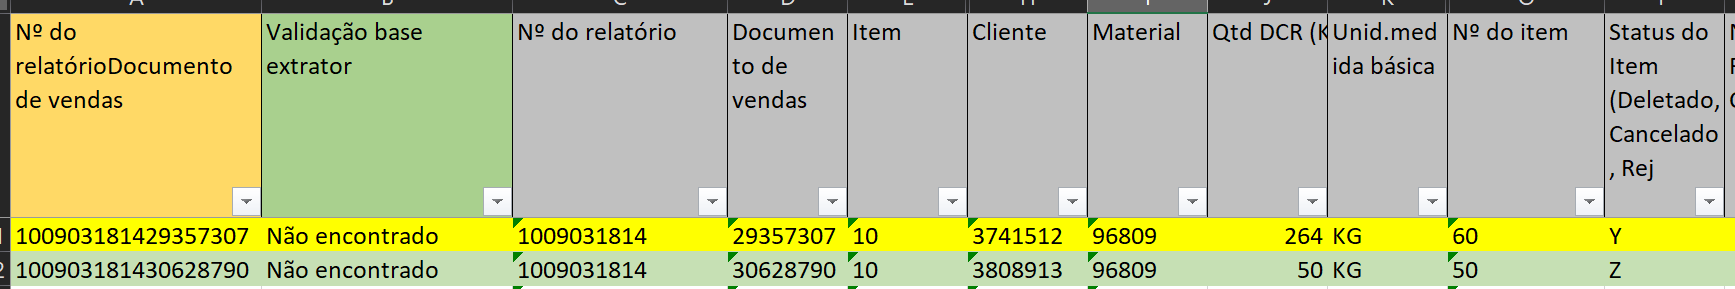

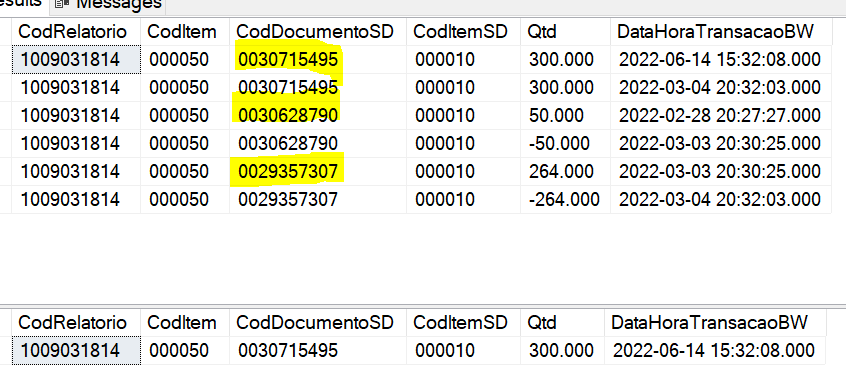



In [66]:
dfRUP[(dfRUP['BERNR'] == '1009031814') & (dfRUP['POSNR'] == '000050')]

,BERNR,POSNR,GBSTA,VBELN,VPOSN,SZEIT,EZEIT,OII_TANKID,METST,METEND,GAUGE_QTY,MENGE,PRSDT,KUNWE,PSTYV,DATUM,Chave
1579537,1009031814,000050,C,0030715495,000010,112749,115349,PADRÃO,000000000,000260260,817.200,300.000,20220304,0003555427,ZGON,20220304,10090318140030715495


In [48]:
arquivo_DEV_tmp_DEVOLUCAO_SIVA = 'C:\\Temp\\faton_siva\\DEV_URSULA\\Homolog dev SIVA 14-11-2022.xlsx'

dfDEV_tmp_DEVOLUCAO_SIVA = pd.read_excel(arquivo_DEV_tmp_DEVOLUCAO_SIVA
                                        ,sheet_name='BASE SAP RUK E RUP'
                                        ,usecols=[0,1,2,3,4,10,17]
                                        ,names=['DCRItem'
                                                ,'CodRelatorio'
                                                ,'ItemDCR'
                                                ,'CodDocVenda'
                                                ,'NumItemDocVenda'
                                                ,'Data'
                                                ,'CodMotivoRecusa']
                                        ,dtype={
                                            'DCRItem':'str'
                                                ,'CodRelatorio':'str'
                                                ,'ItemDCR':'str'
                                                ,'CodDocVenda':'str'
                                                ,'NumItemDocVenda':'str'
                                                ,'Data':'str'
                                                ,'CodMotivoRecusa':'str'
                                        }
                                        ,header=1
                            )

dfDEV_tmp_DEVOLUCAO_SIVA[dfDEV_tmp_DEVOLUCAO_SIVA['CodDocVenda']=='30760353']

,DCRItem,CodRelatorio,ItemDCR,CodDocVenda,NumItemDocVenda,Data,CodMotivoRecusa
2570,100907626530,1009076265,30,30760353,10,2022-03-14 00:00:00,V2


In [49]:
arquivo_DEVOLUCAO_SIVA = 'C:\\Temp\\faton_siva\\DEV_URSULA\\dev_SIVA_20220301_a_20220331.csv'

dfDEV_DEVOLUCAO_SIVA = pd.read_csv(arquivo_DEVOLUCAO_SIVA
                                        ,usecols=[0,1,2,3,4,25,26]
                                        ,sep=','
                                        ,names=['CodDocVenda_DEV_DATABRICKS'
                                                ,'NumItemDocVenda_DEV_DATABRICKS'
                                                ,'OrdemPlan_DEV_DATABRICKS'
                                                ,'DCRPlan_DEV_DATABRICKS'
                                                ,'ItemDCRPlan_DEV_DATABRICKS'
                                                ,'CodMotivoRecusa_DEV_DATABRICKS'
                                                ,'NomMotivoRecusa_DEV_DATABRICKS']
                                        ,dtype={
                                            'CodDocVenda_DEV_DATABRICKS':'int'
                                                ,'NumItemDocVenda_DEV_DATABRICKS':'str'
                                                ,'OrdemPlan_DEV_DATABRICKS':'str'
                                                ,'DCRPlan_DEV_DATABRICKS':'str'
                                                ,'ItemDCRPlan_DEV_DATABRICKS':'int'
                                                ,'CodMotivoRecusa_DEV_DATABRICKS':'str'
                                                ,'NomMotivoRecusa_DEV_DATABRICKS':'str'
                                        }
                                        ,header=0
                            )

dfDEV_DEVOLUCAO_SIVA['DCRItem'] = dfDEV_DEVOLUCAO_SIVA['DCRPlan_DEV_DATABRICKS'].astype(str) + dfDEV_DEVOLUCAO_SIVA['ItemDCRPlan_DEV_DATABRICKS'].astype(str)


resultAmostra = pd.merge(left=dfDEV_tmp_DEVOLUCAO_SIVA
                              , right=dfDEV_DEVOLUCAO_SIVA 
                              , left_on='DCRItem'
                              , right_on='DCRItem' 
                              ,how='left'
                                    )[['CodDocVenda_DEV_DATABRICKS'
                                       ,'NumItemDocVenda_DEV_DATABRICKS'
                                       ,'DCRPlan_DEV_DATABRICKS'
                                       ,'ItemDCRPlan_DEV_DATABRICKS'
                                       ,'DCRItem'
                                       ,'CodMotivoRecusa_DEV_DATABRICKS'
                                       ,'CodMotivoRecusa']]



resultAmostra.loc[((resultAmostra['DCRItem'] == resultAmostra['DCRItem']) & (resultAmostra['CodMotivoRecusa_DEV_DATABRICKS'] == resultAmostra['CodMotivoRecusa'])), 'Comparacao'] = 'Igual'
resultAmostra.loc[((resultAmostra['DCRItem'] == resultAmostra['DCRItem']) & (resultAmostra['CodMotivoRecusa_DEV_DATABRICKS'] != resultAmostra['CodMotivoRecusa'])), 'Comparacao'] = 'Diferente'


resultAmostra.groupby(['Comparacao'], as_index=False).agg(Qtd=('Comparacao','count'))

#resultAmostra

,Comparacao,Qtd
0,Diferente,158
1,Igual,5760


In [75]:
resultAmostra_DIVERGENCIA_MOTIVO_RECUSA = resultAmostra[resultAmostra['Comparacao']=='Diferente'].sort_values(by='CodDocVenda_DEV_DATABRICKS')

resultAmostra_DIVERGENCIA_MOTIVO_RECUSA.fillna(-1,inplace=True)

resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['CodDocVenda_DEV_DATABRICKS'] = resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['CodDocVenda_DEV_DATABRICKS'].astype("int").astype("str")
resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['ItemDCRPlan_DEV_DATABRICKS'] = resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['ItemDCRPlan_DEV_DATABRICKS'].astype("int").astype("str")

resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['CodDocVenda_DEV_DATABRICKS'] = pd.Series(resultAmostra_DIVERGENCIA_MOTIVO_RECUSA['CodDocVenda_DEV_DATABRICKS']).astype(str).str.zfill(10) 

resultAmostra_DIVERGENCIA_MOTIVO_RECUSA.to_csv('C:\\Temp\\faton_siva\\DEV_URSULA\\ov_divergencia_motivo_recusa.csv'
                                               , sep=';'
                                               , encoding='latin-1'
                                               , index=False)